### Dependencies

In [192]:
import pandas as pd
import numpy as np
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import graphviz
from sklearn import tree
from IPython.display import Image, display
import pydotplus
from pandas.table.plotting import table

ModuleNotFoundError: No module named 'pandas.table'

### Loading the Data

In [3]:
iris_data=datasets.load_iris()
iris_df=pd.DataFrame(iris_data['data'], columns=iris_data['feature_names'])
iris_df['target']=iris_data['target']
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


### Pairplot

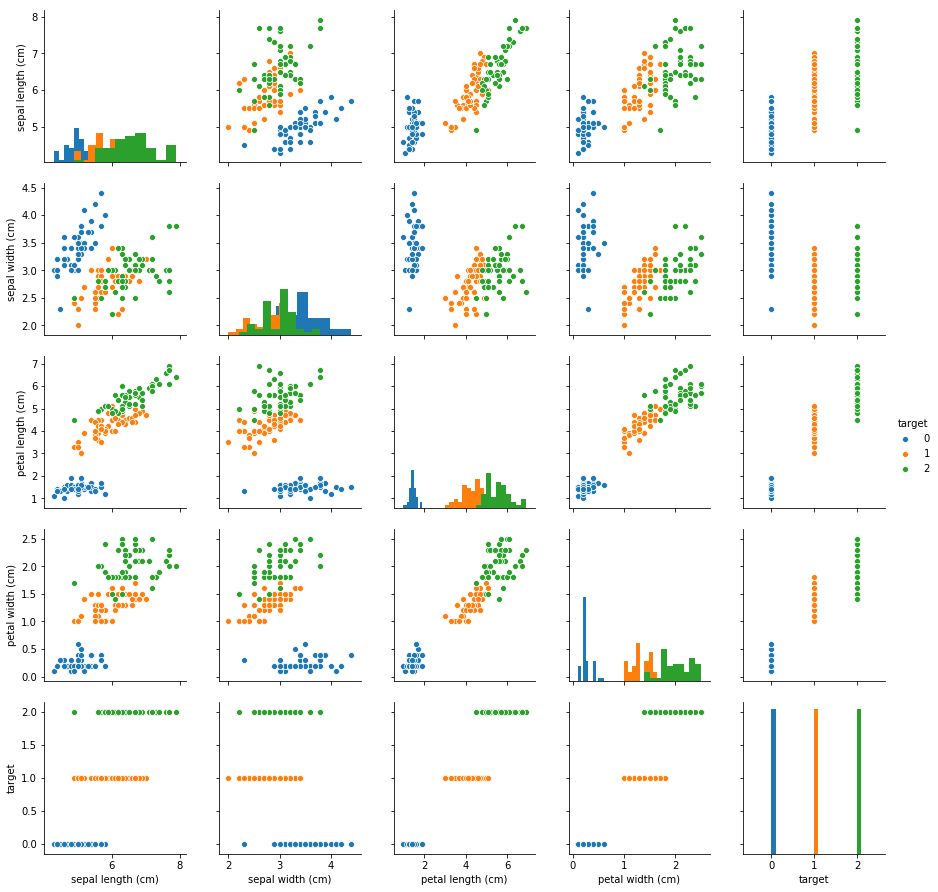

In [4]:
sns.pairplot(iris_df, hue='target', diag_kind='hist')

### Correlation

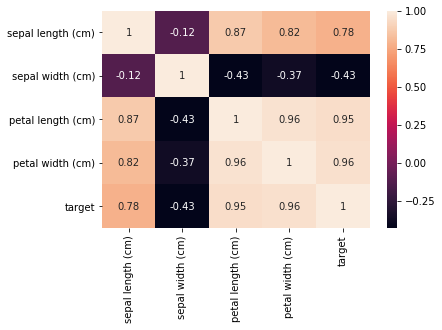

In [5]:
corr = iris_df.corr()
sns.heatmap(corr, annot=True)

### Model Training

In [6]:
iris_df['target'] = iris_df['target'].map({0: iris_data['target_names'][0],
                                          1: iris_data['target_names'][1],
                                          2: iris_data['target_names'][2]})
X=iris_df.drop('target', axis=1)
y=iris_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y)
DTC=DecisionTreeClassifier()
DTC.fit(X_train, y_train)

DecisionTreeClassifier()

### Model Evaluation

In [7]:
DTC.score(X_test, y_test)

0.9210526315789473

Text(0.5, 1.0, 'Confusion matrix')

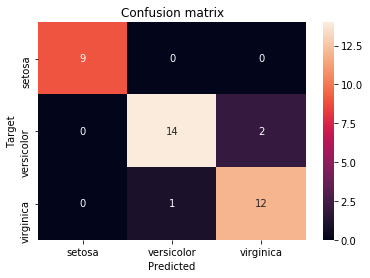

In [8]:
cm = confusion_matrix(y_test, DTC.predict(X_test))
sns.heatmap(cm, annot=True, xticklabels=['setosa', 'versicolor', 'virginica'], 
            yticklabels=['setosa', 'versicolor', 'virginica'])
plt.xlabel('Predicted')
plt.ylabel('Target')
plt.title('Confusion matrix')

### Visualization

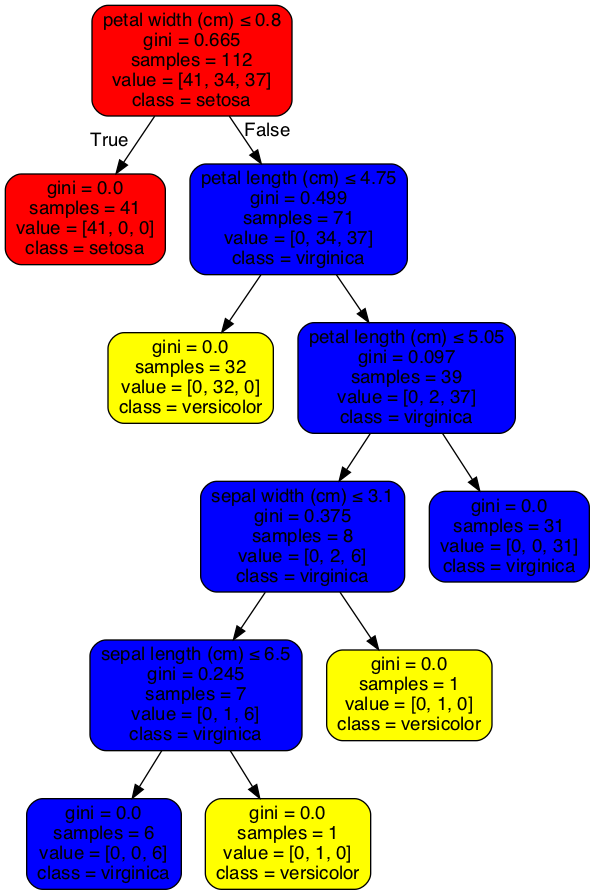

In [9]:
dot_data = tree.export_graphviz(DTC, out_file=None, 
                                feature_names=iris_data['feature_names'],  
                                class_names=iris_data['target_names'],  
                                filled=True, rounded=True,  
                                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
colors = ('red', 'yellow', 'blue')
nodes = graph.get_node_list()
for node in nodes:
    if node.get_label():
        values = [int(ii) for ii in node.get_label().split('value = [')[1].split(']')[0].split(',')]
        color = '#{:02x}{:02x}{:02x}'.format(values[0], values[1], values[2])
        node.set_fillcolor(colors[np.argmax(values)])
graph.write_png('colored_tree.png')
def viewPydot(pdot):
    plt = Image(pdot.create_png())
    display(plt)

viewPydot(graph)

## Simple Decision Tree

In [158]:
X, y=datasets.make_classification(n_samples=20, n_features=2, n_redundant=0)

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
DTC=DecisionTreeClassifier()
DTC.fit(X_train, y_train)
DTC.score(X_test, y_test)

1.0

In [210]:
X_train

array([[-1.12487525,  1.08236471],
       [-0.38991882,  2.00357931],
       [ 0.69312732,  0.85184323],
       [ 0.71462319, -0.75740594],
       [ 0.40922633,  0.80156224],
       [-1.66774441, -3.34486082],
       [ 1.50555185,  1.09250671],
       [-1.34861879, -2.21146196],
       [-0.32463742,  1.23893946],
       [-0.94144153, -0.78956113],
       [ 0.57054312,  3.03401783],
       [ 1.33192111, -1.55654072],
       [ 0.64437895,  1.05471554],
       [ 1.02461088,  1.397064  ],
       [ 0.75137053, -0.52685171]])

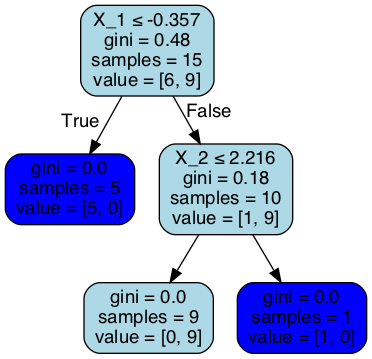

In [214]:
dot_data = tree.export_graphviz(DTC, out_file=None, 
#                                 feature_names=iris_data['feature_names'],  
                                feature_names=['X_1', 'X_2'],                                  
#                                 class_names=iris_data['target_names'],  
                                filled=True, rounded=True,  
                                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
# colors = ('red', 'yellow', 'blue')
colors = ('blue', 'lightblue')
nodes = graph.get_node_list()
for node in nodes:
    if node.get_label():
        values = [int(ii) for ii in node.get_label().split('value = [')[1].split(']')[0].split(',')]
#         color = '#{:02x}{:02x}{:02x}'.format(values[0], values[1], values[2])
        color = '#{:02x}{:02x}'.format(values[0], values[1])
        node.set_fillcolor(colors[np.argmax(values)])
graph.write_png('images/colored_tree.png')
def viewPydot(pdot):
    plt = Image(pdot.create_png())
    display(plt)

viewPydot(graph)

In [217]:
df=pd.DataFrame(X_train, columns=['X_1', 'X_2'])
df['Y']=y_train
# df.sort_values(['X_2', 'X_1'])
np.round(df.sort_values(['X_1', 'X_2']), 3)
# ax=plt.subplot(111, frame_on=False)
# ax.yaxis.set_visible(False)
# ax.xaxis.set_visible(False)
# pd.table.plotting.table(ax, df)
# plt.savefig('images/table.png')

,X_1,X_2,Y
5,-1.668,-3.345,0
7,-1.349,-2.211,0
0,-1.125,1.082,0
9,-0.941,-0.790,0
1,-0.390,2.004,0
8,-0.325,1.239,1
4,0.409,0.802,1
10,0.571,3.034,0
12,0.644,1.055,1
2,0.693,0.852,1


Text(0.3, 2.5, 'X_2 = 2.216')

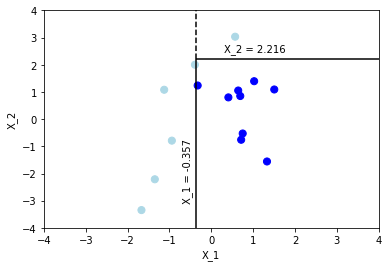

In [186]:
colormap={0: 'lightblue', 
       1: 'blue'}
colors=[colormap[value] for value in df['Y']]
df.plot(kind='scatter', x='X_1', y='X_2', c=colors, s=50)
plt.vlines(-.357, -4, 2.216)
plt.hlines(2.216, -.357, 4)
plt.vlines(-.357, 2.216, 4, linestyles='--')
plt.xlim(-3, 3)
# plt.vlines(1.454, -.23, 2)
plt.xlim(-4, 4)
plt.ylim(-4, 4)
plt.annotate('X_1 = -0.357', (-.7, -1), rotation=90)
plt.annotate('X_2 = 2.216', (.3, 2.5))

## Bagging

In [222]:
X, y=datasets.make_classification(n_samples=1000, n_informative=15, n_redundant=5)
print(X.shape, y.shape)

(1000, 20) (1000,)


In [230]:
X_train, X_test, y_train, y_test = train_test_split(X, y)
DTC=DecisionTreeClassifier()
DTC.fit(X_train, y_train)
DTC.score(X_test, y_test)

0.74

In [237]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier

model=BaggingClassifier()
cv=RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
n_scores=cross_val_score(model, X, y, scoring='accuracy', cv=cv)
# n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
print(np.mean(n_scores), np.std(n_scores))

0.8590000000000001 0.033301651610693435


In [234]:
from sklearn.datasets import make_classification
from sklearn.ensemble import BaggingClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=5)
# define the model
model = BaggingClassifier()
# fit the model on the whole dataset
model.fit(X, y)
# make a single prediction
row = [[-4.7705504,-1.88685058,-0.96057964,2.53850317,-6.5843005,3.45711663,-7.46225013,2.01338213,-0.45086384,-1.89314931,-2.90675203,-0.21214568,-0.9623956,3.93862591,0.06276375,0.33964269,4.0835676,1.31423977,-2.17983117,3.1047287]]
yhat = model.predict(row)
print('Predicted Class: %d' % yhat[0])

Predicted Class: 1


In [235]:
# evaluate bagging algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
# define dataset
X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=5)
# define the model
model = BaggingClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report performance
print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy: 0.851 (0.036)
Accuracy: 0.860 (0.045)


>10 0.864 (0.033)
>50 0.879 (0.036)
>100 0.878 (0.037)
>500 0.882 (0.038)
>1000 0.885 (0.038)


/Users/kevinlee/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


>5000 0.885 (0.037)


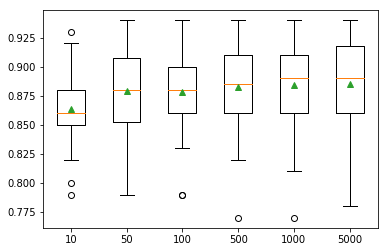

In [238]:
# explore bagging ensemble number of trees effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=5)
    return X, y
 
# get a list of models to evaluate
def get_models():
    models = dict()
    # define number of trees to consider
#     n_trees = [10, 50, 100, 500, 1000, 5000]
    n_trees = [1, 10, 50, 100, 500, 1000]
    for n in n_trees:
        models[str(n)] = BaggingClassifier(n_estimators=n)
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X, y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_xlabel'

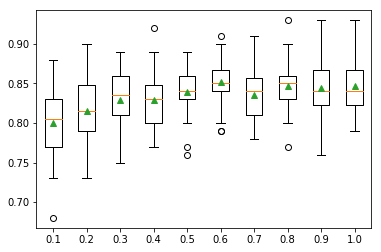

In [243]:
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.xlabel('Number of Trees')
pyplot.xlabel('Accuracy')
pyplot.show()

In [254]:
results

[array([0.73, 0.84, 0.72, 0.78, 0.75, 0.75, 0.8 , 0.76, 0.76, 0.79, 0.77,
        0.75, 0.78, 0.71, 0.83, 0.73, 0.71, 0.77, 0.82, 0.75, 0.69, 0.68,
        0.77, 0.73, 0.79, 0.8 , 0.84, 0.73, 0.8 , 0.83]),
 array([0.68, 0.85, 0.78, 0.85, 0.81, 0.78, 0.82, 0.84, 0.84, 0.84, 0.78,
        0.82, 0.84, 0.83, 0.74, 0.77, 0.83, 0.85, 0.78, 0.77, 0.74, 0.75,
        0.72, 0.77, 0.82, 0.74, 0.82, 0.74, 0.83, 0.84]),
 array([0.76, 0.81, 0.83, 0.88, 0.76, 0.8 , 0.89, 0.83, 0.84, 0.81, 0.77,
        0.79, 0.79, 0.78, 0.78, 0.84, 0.8 , 0.86, 0.86, 0.75, 0.77, 0.84,
        0.74, 0.83, 0.89, 0.8 , 0.83, 0.8 , 0.84, 0.88]),
 array([0.8 , 0.85, 0.82, 0.87, 0.82, 0.78, 0.85, 0.83, 0.8 , 0.8 , 0.78,
        0.81, 0.84, 0.79, 0.85, 0.82, 0.86, 0.83, 0.79, 0.75, 0.78, 0.84,
        0.77, 0.82, 0.86, 0.87, 0.82, 0.83, 0.83, 0.78]),
 array([0.77, 0.78, 0.75, 0.89, 0.82, 0.76, 0.81, 0.84, 0.84, 0.86, 0.8 ,
        0.86, 0.87, 0.78, 0.79, 0.79, 0.88, 0.87, 0.86, 0.81, 0.84, 0.76,
        0.78, 0.87, 0.91, 0.

>0.1 0.794 (0.035)
>0.2 0.827 (0.036)
>0.3 0.843 (0.041)
>0.4 0.841 (0.034)
>0.5 0.849 (0.034)
>0.6 0.849 (0.027)
>0.7 0.850 (0.030)
>0.8 0.855 (0.023)
>0.9 0.858 (0.028)
>1.0 0.862 (0.034)


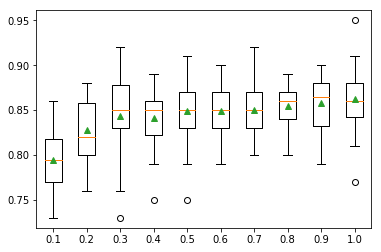

In [301]:
# explore bagging ensemble number of samples effect on performance
from numpy import mean
from numpy import std
from numpy import arange
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15)
    return X, y
 
# get a list of models to evaluate
def get_models():
    models = dict()
    # explore ratios from 10% to 100% in 10% increments
    for i in arange(0.1, 1.1, 0.1):
        key = '%.1f' % i
        models[key] = BaggingClassifier(max_samples=i)
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X, y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

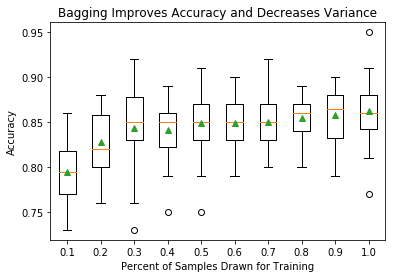

In [302]:
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.title('Bagging Improves Accuracy and Decreases Variance')
pyplot.xlabel('Percent of Samples Drawn for Training')
pyplot.ylabel('Accuracy')
pyplot.show()

>1 0.774 (0.036)
>10 0.859 (0.041)
>50 0.883 (0.039)
>100 0.883 (0.037)
>500 0.882 (0.037)
>1000 0.886 (0.027)


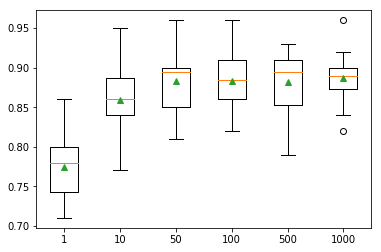

In [245]:
# explore bagging ensemble number of trees effect on performance
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
from matplotlib import pyplot
 
# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=20, n_informative=15, n_redundant=5, random_state=5)
    return X, y
 
# get a list of models to evaluate
def get_models():
    models = dict()
    # define number of trees to consider
#     n_trees = [10, 50, 100, 500, 1000, 5000]
    n_trees = [1, 10, 50, 100, 500, 1000]
    for n in n_trees:
        models[str(n)] = BaggingClassifier(n_estimators=n)
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X, y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

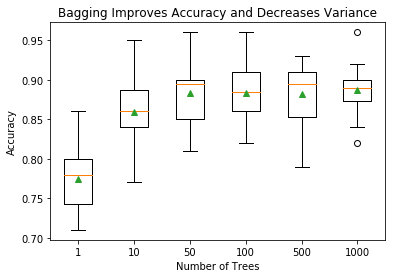

In [248]:
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.title('Bagging Improves Accuracy and Decreases Variance')
pyplot.xlabel('Number of Trees')
pyplot.ylabel('Accuracy')
pyplot.show()

In [252]:
# importing required libraries
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# read the train and test dataset
train_data = pd.read_csv('train-data.csv')
test_data = pd.read_csv('test-data.csv')

# shape of the dataset
print('Shape of training data :',train_data.shape)
print('Shape of testing data :',test_data.shape)

# Now, we need to predict the missing target variable in the test data
# target variable - Survived

# seperate the independent and target variable on training data
train_x = train_data.drop(columns=['Survived'],axis=1)
train_y = train_data['Survived']

# seperate the independent and target variable on testing data
test_x = test_data.drop(columns=['Survived'],axis=1)
test_y = test_data['Survived']

'''
Create the object of the GradientBoosting Classifier model
You can also add other parameters and test your code here
Some parameters are : learning_rate, n_estimators
Documentation of sklearn GradientBoosting Classifier: 

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
'''
model = GradientBoostingClassifier(n_estimators=100,max_depth=5)

# fit the model with the training data
model.fit(train_x,train_y)

# predict the target on the train dataset
predict_train = model.predict(train_x)
print('\nTarget on train data',predict_train) 

# Accuray Score on train dataset
accuracy_train = accuracy_score(train_y,predict_train)
print('\naccuracy_score on train dataset : ', accuracy_train)

# predict the target on the test dataset
predict_test = model.predict(test_x)
print('\nTarget on test data',predict_test) 

# Accuracy Score on test dataset
accuracy_test = accuracy_score(test_y,predict_test)
print('\naccuracy_score on test dataset : ', accuracy_test)

FileNotFoundError: File b'train-data.csv' does not exist

>1.0 0.686 (0.012)
>2.0 0.717 (0.011)
>3.0 0.759 (0.012)
>4.0 0.785 (0.012)
>5.0 0.813 (0.012)
>6.0 0.829 (0.012)
>7.0 0.845 (0.010)
>8.0 0.854 (0.008)
>9.0 0.856 (0.011)
>10.0 0.858 (0.010)
>11.0 0.855 (0.010)
>12.0 0.853 (0.010)
>13.0 0.851 (0.012)
>14.0 0.850 (0.012)


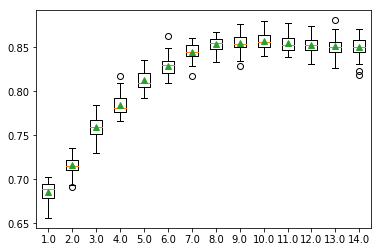

In [357]:
# explore bagging ensemble number of samples effect on performance
from numpy import mean
from numpy import std
from numpy import arange
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier

from matplotlib import pyplot
 
# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=10000, n_features=20, n_informative=15)
    return X, y
 
# get a list of models to evaluate
def get_models():
    models = dict()
    # explore ratios from 10% to 100% in 10% increments
#     n_trees = [5, 10, 25, 50, 75, 100]
    n_depth = arange(1, 15)
    for i in n_depth:
        key = '%.1f' % i
        models[key] = DecisionTreeClassifier(max_depth=i)
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X, y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

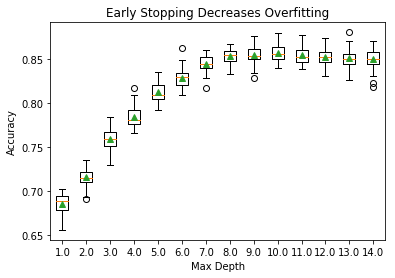

In [358]:
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.title('Early Stopping Decreases Overfitting')
pyplot.xlabel('Max Depth')
pyplot.ylabel('Accuracy')
pyplot.show()

>1 0.763 (0.020)
>2 0.804 (0.015)
>3 0.827 (0.015)
>4 0.831 (0.012)
>5 0.837 (0.012)
>6 0.836 (0.012)
>7 0.848 (0.009)
>8 0.845 (0.012)
>9 0.847 (0.011)
>10 0.849 (0.011)
>11 0.849 (0.012)
>12 0.851 (0.012)
>13 0.851 (0.014)
>14 0.852 (0.011)
>15 0.855 (0.010)
>16 0.853 (0.012)
>17 0.854 (0.012)
>18 0.854 (0.011)
>19 0.854 (0.010)
>20 0.854 (0.009)


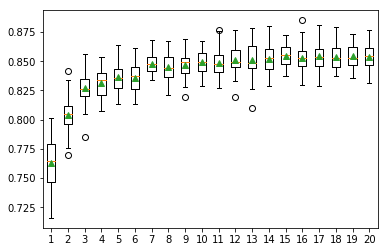

In [364]:
# explore bagging ensemble number of samples effect on performance
from numpy import mean
from numpy import std
from numpy import arange
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier

from matplotlib import pyplot
 
# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=10000, n_features=20, n_informative=15)
    return X, y
 
# get a list of models to evaluate
def get_models():
    models = dict()
    # explore ratios from 10% to 100% in 10% increments
#     n_trees = [5, 10, 25, 50, 75, 100]
    n_feature = arange(1, 21)
    for i in n_feature:
#         key = '%.1f' % i
        models[i] = DecisionTreeClassifier(max_features=i)
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X, y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

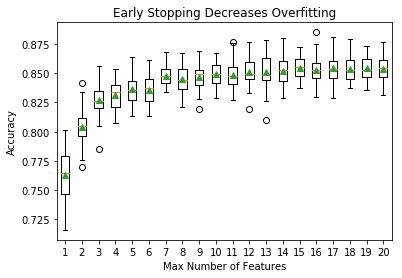

In [365]:
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.title('Early Stopping Decreases Overfitting')
pyplot.xlabel('Max Number of Features')
pyplot.ylabel('Accuracy')
pyplot.show()

In [295]:
X, y = make_classification(n_samples=1000, n_features=50, n_informative=15)
clf=DecisionTreeClassifier()
clf.fit(X, y)
clf.get_depth()

14

>2 0.819 (0.041)
>3 0.821 (0.046)
>4 0.825 (0.045)
>5 0.822 (0.047)
>6 0.818 (0.045)
>7 0.822 (0.044)
>8 0.819 (0.044)
>9 0.825 (0.045)
>10 0.818 (0.045)
>11 0.820 (0.039)
>12 0.824 (0.044)
>13 0.823 (0.044)
>14 0.825 (0.040)


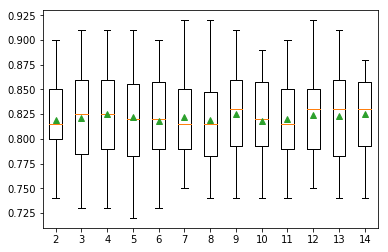

In [292]:
# explore bagging ensemble number of samples effect on performance
from numpy import mean
from numpy import std
from numpy import arange
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier

from matplotlib import pyplot
 
# get the dataset
def get_dataset():
    X, y = make_classification(n_samples=1000, n_features=50, n_informative=15)
    return X, y
 
# get a list of models to evaluate
def get_models():
    models = dict()
    # explore ratios from 10% to 100% in 10% increments
#     n_trees = [5, 10, 25, 50, 75, 100]
    n_min_samples = arange(2, 15)
    for i in n_min_samples:
        key = i
        models[key] = DecisionTreeClassifier(min_samples_split=i)
    return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
    # define the evaluation procedure
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    # evaluate the model and collect the results
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
 
# define dataset
X, y = get_dataset()
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    # evaluate the model
    scores = evaluate_model(model, X, y)
    # store the results
    results.append(scores)
    names.append(name)
    # summarize the performance along the way
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

In [294]:
models[14].get_depth()

NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

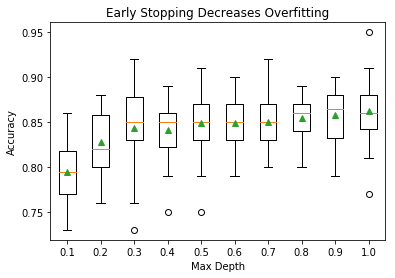

In [304]:
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.title('Early Stopping Decreases Overfitting')
pyplot.xlabel('Max Depth')
pyplot.ylabel('Accuracy')
pyplot.show()

[DecisionTreeClassifier(random_state=1364516262),
 DecisionTreeClassifier(random_state=1598627579),
 DecisionTreeClassifier(random_state=874536592),
 DecisionTreeClassifier(random_state=1768660318),
 DecisionTreeClassifier(random_state=1730517015),
 DecisionTreeClassifier(random_state=1918730287),
 DecisionTreeClassifier(random_state=618976970),
 DecisionTreeClassifier(random_state=2014014729),
 DecisionTreeClassifier(random_state=413581121),
 DecisionTreeClassifier(random_state=777446495)]

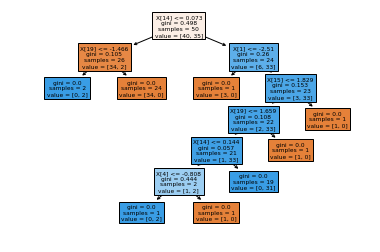

In [315]:
data=make_classification()
bc=BaggingClassifier()
X_train, X_test, y_train, y_test=train_test_split(data[0], data[1])
bc.fit(X_train, y_train)
# fn=data.feature_names
# cn=data.target_names
# fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=800)
tree.plot_tree(bc.estimators_[9],
#                feature_names = fn, 
#                class_names=cn,
               filled = True);
# fig.savefig('rf_individualtree.png')
bc.estimators_

**Work on This Later for GBM**

In [ ]:
#Import libraries:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

train = pd.read_csv('train_modified.csv')
target = 'Disbursed'
IDcol = 'ID'

def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['Disbursed'])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain['Disbursed'], cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print "\nModel Report"
    print "Accuracy : %.4g" % metrics.accuracy_score(dtrain['Disbursed'].values, dtrain_predictions)
    print "AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['Disbursed'], dtrain_predprob)
    
    if performCV:
        print "CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')
        
#Choose all predictors except target & IDcols
predictors = [x for x in train.columns if x not in [target, IDcol]]
gbm0 = GradientBoostingClassifier(random_state=10)
modelfit(gbm0, train, predictors)

#Choose all predictors except target & IDcols
predictors = [x for x in train.columns if x not in [target, IDcol]]
param_test1 = {'n_estimators':range(20,81,10)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(train[predictors],train[target])

gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

param_test2 = {'max_depth':range(5,16,2), 'min_samples_split':range(200,1001,200)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(train[predictors],train[target])
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_


param_test3 = {'min_samples_split':range(1000,2100,200), 'min_samples_leaf':range(30,71,10)}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=9,max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(train[predictors],train[target])
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

modelfit(gsearch3.best_estimator_, train, predictors)

param_test4 = {'max_features':range(7,20,2)}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=9, min_samples_split=1200, min_samples_leaf=60, subsample=0.8, random_state=10),
param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(train[predictors],train[target])
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=60,max_depth=9,min_samples_split=1200, min_samples_leaf=60, subsample=0.8, random_state=10,max_features=7),
param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(train[predictors],train[target])
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

predictors = [x for x in train.columns if x not in [target, IDcol]]
gbm_tuned_1 = GradientBoostingClassifier(learning_rate=0.05, n_estimators=120,max_depth=9, min_samples_split=1200,min_samples_leaf=60, subsample=0.85, random_state=10, max_features=7)
modelfit(gbm_tuned_1, train, predictors)

predictors = [x for x in train.columns if x not in [target, IDcol]]
gbm_tuned_2 = GradientBoostingClassifier(learning_rate=0.01, n_estimators=600,max_depth=9, min_samples_split=1200,min_samples_leaf=60, subsample=0.85, random_state=10, max_features=7)
modelfit(gbm_tuned_2, train, predictors)

predictors = [x for x in train.columns if x not in [target, IDcol]]
gbm_tuned_3 = GradientBoostingClassifier(learning_rate=0.005, n_estimators=1200,max_depth=9, min_samples_split=1200, min_samples_leaf=60, subsample=0.85, random_state=10, max_features=7,
warm_start=True)
modelfit(gbm_tuned_3, train, predictors, performCV=False)

predictors = [x for x in train.columns if x not in [target, IDcol]]
gbm_tuned_4 = GradientBoostingClassifier(learning_rate=0.005, n_estimators=1500,max_depth=9, min_samples_split=1200, min_samples_leaf=60, subsample=0.85, random_state=10, max_features=7,
warm_start=True)
modelfit(gbm_tuned_4, train, predictors, performCV=False)

https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/